Employee Turnover Analytics


In [103]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score

# ignoring future warnings
import warnings
warnings.filterwarnings('ignore')

Performing data quality checks by checking for missing values.

In [104]:
# read the csv file using pandas
Turnover = pd.read_csv('HR_comma_sep.csv')
print('The original data is as follows: \n',Turnover)

# printing missing values
print('Sum of missing values for all features are as follows:\n',Turnover.isnull().sum())

The original data is as follows: 
        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2   

Understanding what factors contributed most to employee turnover at EDA.
Printing a heatmap of the correlation matrix between all numerical
features or columns in the data.
Next we print the distribution plot of:
■ Employee Satisfaction
■ Employee Evaluation
■ Employee Average Monthly Hours
And lastlty we draw the bar plot of the employee project count of both employees
who left and stayed in the organization.

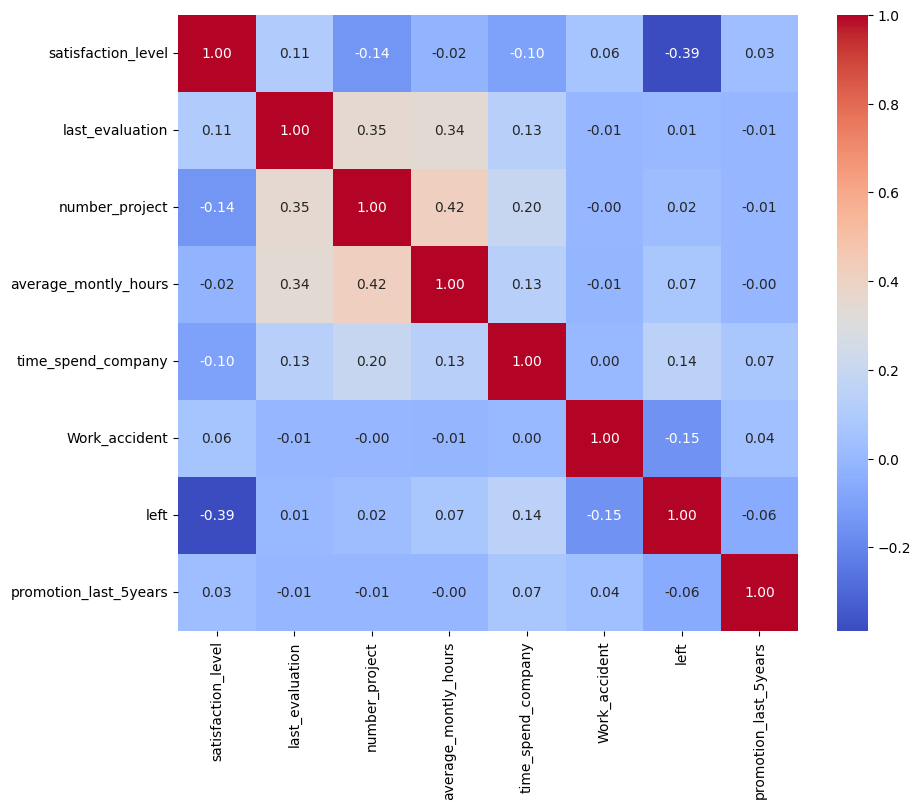

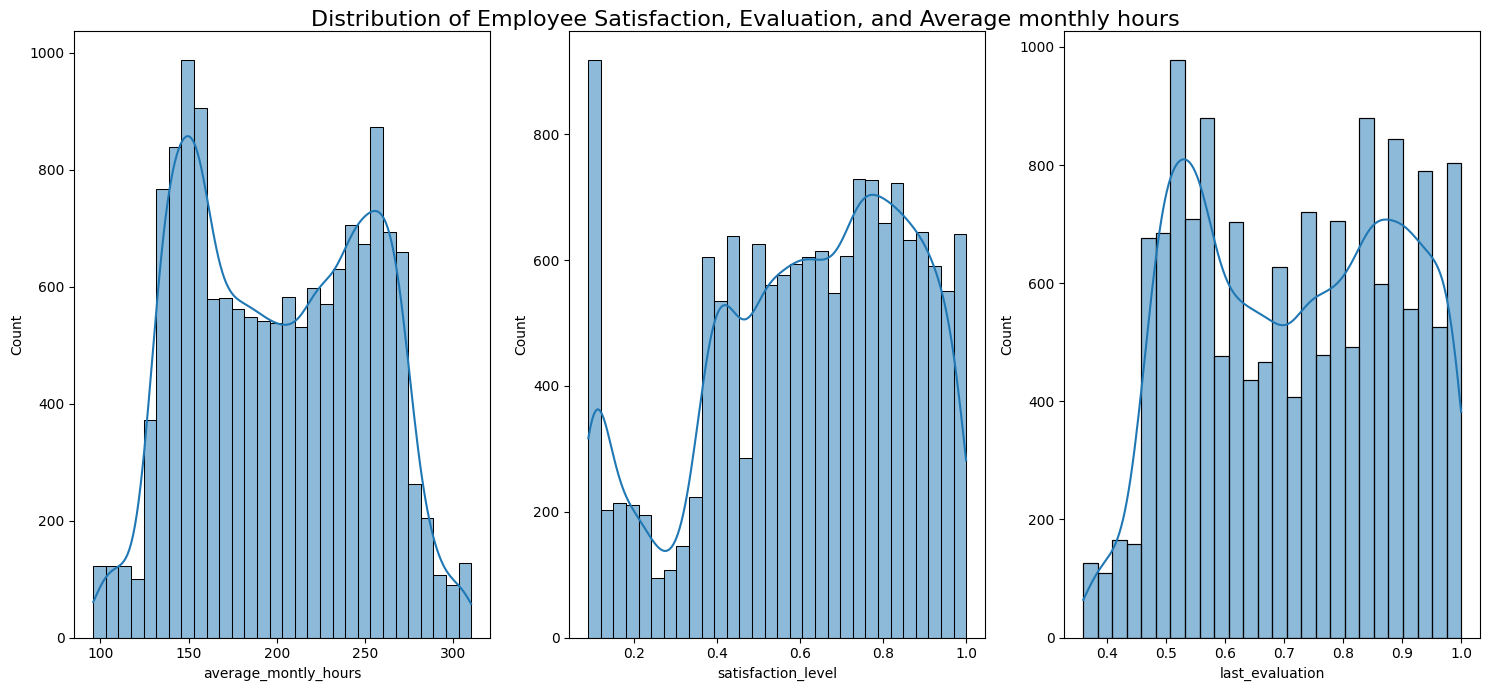

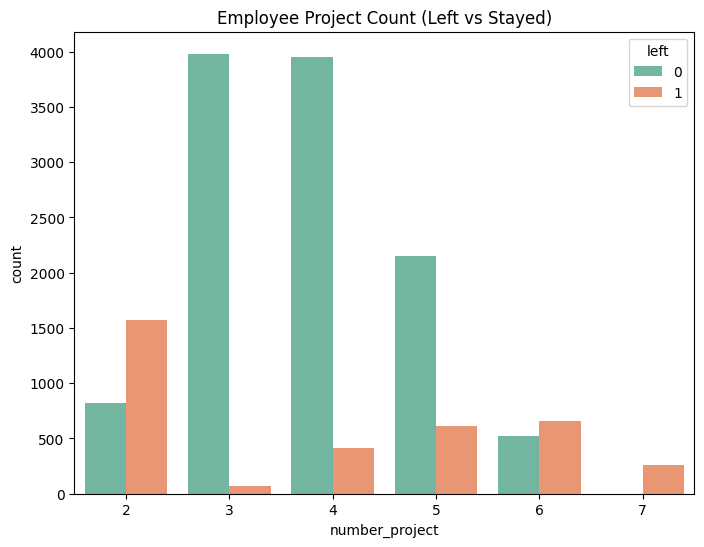

From the bar plot we can infer that emplyees involved in projects started decreasing after project 4


In [105]:
# Check for columns with numerical data types 
numerical_columns = Turnover.select_dtypes(include=['float64', 'int64']).columns
# Computing the correlation matrix between numerical features
corr_matrix = Turnover[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Plot the distribution for Employee Satisfaction, Evaluation, and Average monthly hours
a = {'satisfaction_level', 'last_evaluation', 'average_montly_hours'}
plt.figure(figsize=(15, 7))
plt.suptitle('Distribution of Employee Satisfaction, Evaluation, and Average monthly hours', fontsize=16)
for i, col in enumerate(a):
    if col in Turnover.columns:
        plt.subplot(1,3,i+1)
        sns.histplot(Turnover[col], kde=True )

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# Bar plot showing the number of projects handled by employees who stayed versus those who left.
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=Turnover, palette='Set2')
plt.title('Employee Project Count (Left vs Stayed)')
plt.show()

# Analyzing and evaluating the bar plot
print('From the bar plot we can infer that emplyees involved in projects started decreasing after project 4')


Performing clustering of employees who left based on their satisfaction and
evaluation.
Choosing columns satisfaction_level, last_evaluation, and left.
Performing K-means clustering of employees who left the company into 3
clusters.

Dataframe of left employees withing their respective clusters:
        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6

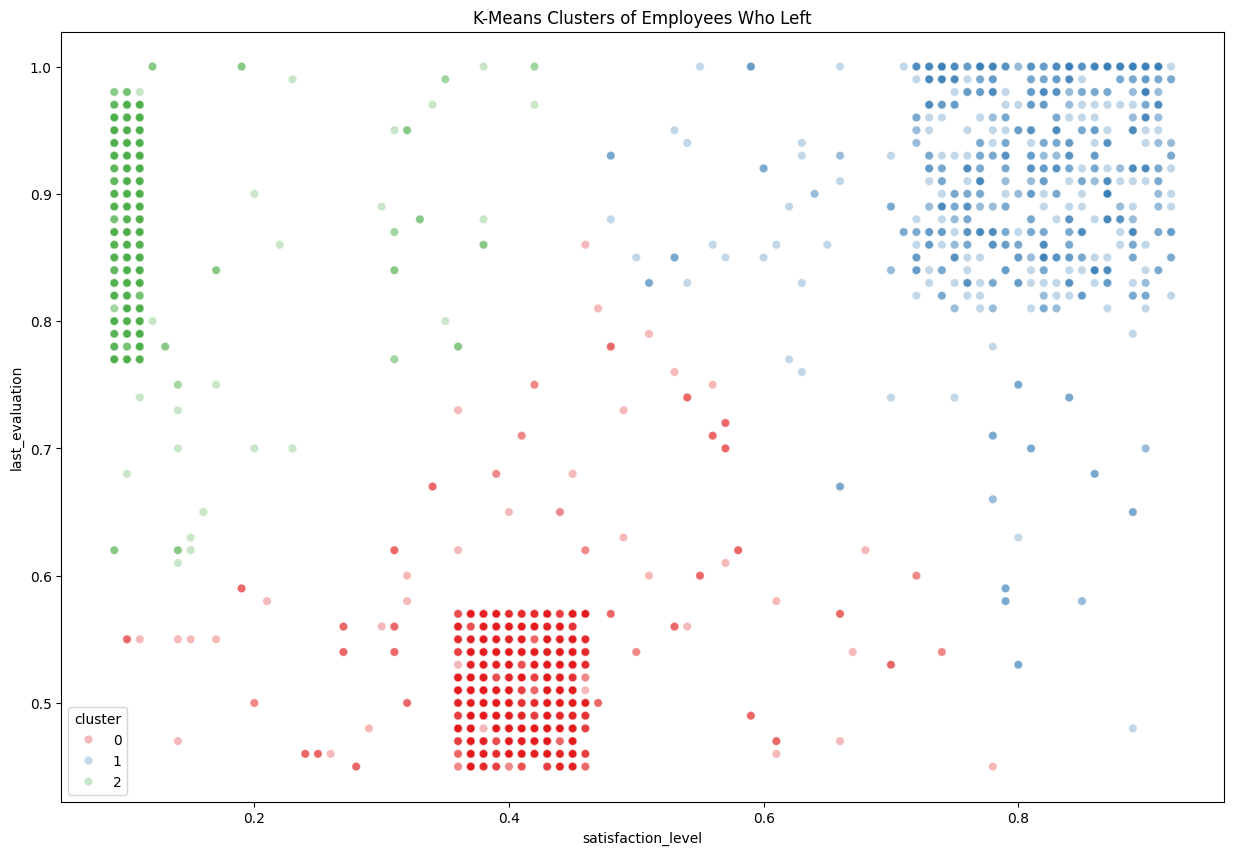

Sum of left emplyees based on their respective cluster:
 Cluster 0 with low satisfaction and midrange evaluation = 1650 
 Cluster 1 with high level of satisfaction and evaluation = 977 
 Cluster 2 with low level of satisfaction and high evaluation= 944
From the plot and sum of cluster we can assume that most of the employees that left the company had in average low level of satisfaction and midrange evaluation


In [106]:
# Filter for employees who left
left = Turnover[Turnover['left'] == 1]

# Selectign satisfaction_level and last_evaluation columns
X = left[['satisfaction_level', 'last_evaluation']]

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left['cluster'] = kmeans.fit_predict(X)
print('Dataframe of left employees withing their respective clusters:\n', left)

# Plot the clusters
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left, alpha= 0.3 ,palette='Set1')
plt.title('K-Means Clusters of Employees Who Left')
plt.show()

# Since we have overlapping datapoint as seen in plot, for same clusters we find the sum for each cluster
zero = (left['cluster']==0).sum()
one = (left['cluster']==1).sum()
two = (left['cluster']==2).sum()
print(f'Sum of left emplyees based on their respective cluster:\n Cluster 0 with low satisfaction and midrange evaluation = {zero} \n Cluster 1 with high level of satisfaction and evaluation = {one} \n Cluster 2 with low level of satisfaction and high evaluation= {two}')

# Evaluation based on clusters
print('From the plot and sum of cluster we can assume that most of the employees that left the company had in average low level of satisfaction and midrange evaluation')


Handling the left Class Imbalance using the SMOTE technique.
By pre-process the data by converting categorical columns to numerical
columns.
Applying the stratified split of the dataset to train and test in the ratio 80:20
with random_state=123.
And upsample the train dataset using the SMOTE technique from the
imblearn module.

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

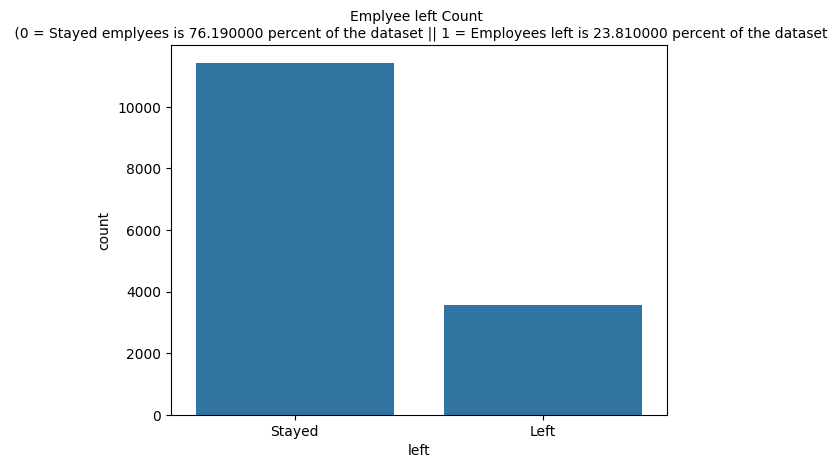

[(0, 9142), (1, 9142)]
Shape of the new oversmapled and undersampled dataset for features : (18284, 18) and target: (18284,)
Original dataset shape Counter({0: 9142, 1: 2857})
Resampled dataset shape Counter({0: 9142, 1: 9142})


In [107]:
# Convert categorical variables department and salary to numerical
Turnover_processed = pd.get_dummies(Turnover, drop_first=True)
print(Turnover_processed)

# Checking for imbalances in target by checking total class count
Stay_percent =  round(Turnover_processed['left'].value_counts()[0]/len(Turnover_processed) * 100,2)
Left_percent =  round(Turnover_processed['left'].value_counts()[1]/len(Turnover_processed) * 100,2)

# Plotting the target variable to check for imbalances
sns.countplot(x='left', data=Turnover_processed)
plt.title('Emplyee left Count \n (0 = Stayed emplyees is %f percent of the dataset || 1 = Employees left is %f percent of the dataset' % (Stay_percent, Left_percent) ,fontsize=10)
plt.xticks(range(2), ["Stayed", "Left"])
plt.show()

# Split into features and target
X = Turnover_processed.drop('left', axis=1)
y = Turnover_processed['left']

# Spliting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# Standardize the input dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying SMOTE to oversample the features and target variable to counter overfitting
smote = SMOTE(random_state=123)
Xtrain_smote, ytrain_smote = smote.fit_resample(X_train, y_train)
print(sorted(Counter(ytrain_smote).items()))
print('Shape of the new oversmapled and undersampled dataset for features :'  , Xtrain_smote.shape, 'and target:',ytrain_smote.shape)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(ytrain_smote)))


Performing 5-fold cross-validation model trainings and evaluating their performance.
1. Training a logistic regression model, then apply a 5-fold CV, and ploting the
classification report.
2. Training a Random Forest Classifier model, then apply a 5-fold CV, and ploting the
classification report.
3. Training a Gradient Boosting Classifier model,  then apply a 5-fold CV, and ploting the
classification report.

In [108]:
# Using sklearn models for training and predicting the employee left target variable 
# Logistic Regressing model
log_model = LogisticRegression(random_state=123)
y_pred_log = cross_val_predict(log_model, Xtrain_smote, ytrain_smote, cv=5)
# Classification report for Regressing model
print("Logistic Regression Classification Report:")
print(classification_report(ytrain_smote, y_pred_log))

# Random forest tree clasifier 
rf_model = RandomForestClassifier(random_state=123)
y_pred_rf = cross_val_predict(rf_model, Xtrain_smote, ytrain_smote, cv=5)
# Classification report for Random forest
print("Random Forest Classification Report:")
print(classification_report(ytrain_smote, y_pred_rf))

# Gradient Boost classifier 
gb_model = GradientBoostingClassifier(random_state=123)
y_pred_gb = cross_val_predict(gb_model, Xtrain_smote, ytrain_smote, cv=5)
# Classification report for Gradient Boost
print("Gradient Boosting Classification Report:")
print(classification_report(ytrain_smote, y_pred_gb))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      9142
           1       0.76      0.81      0.79      9142

    accuracy                           0.78     18284
   macro avg       0.78      0.78      0.78     18284
weighted avg       0.78      0.78      0.78     18284

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9142
           1       1.00      0.98      0.99      9142

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9142
           1       0.97      0.96      0.97      9142

    accuracy                           0.97     18284
   macr

Identifying the best model and justify the evaluation metrics used.
1. Finding the ROC/AUC for each model and plot the ROC curve.
2. Finding the confusion matrix for each of the models.
3. Explaining which metric needs to be used from the confusion matrix: Recall or Precision?


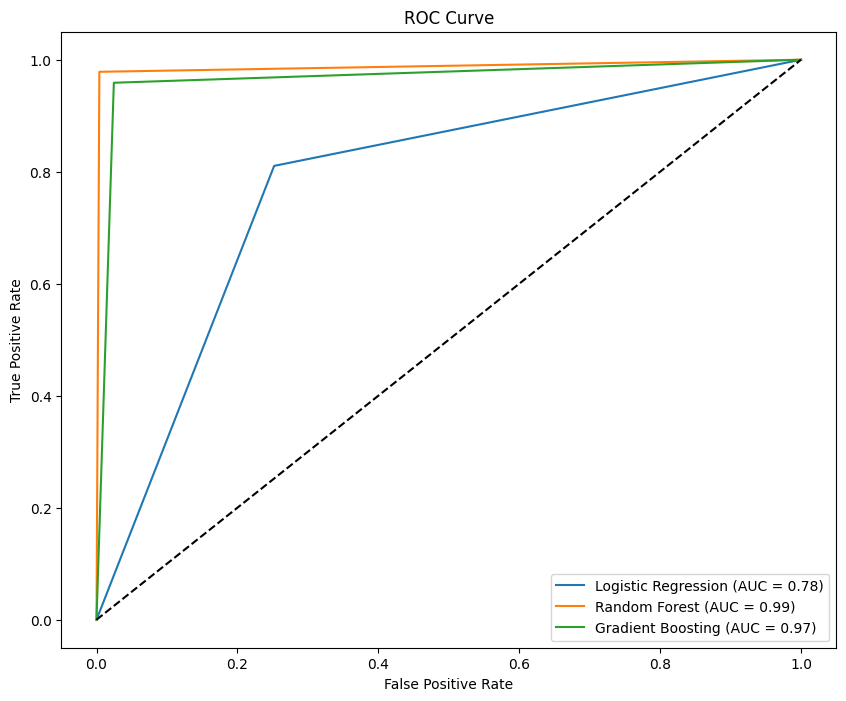

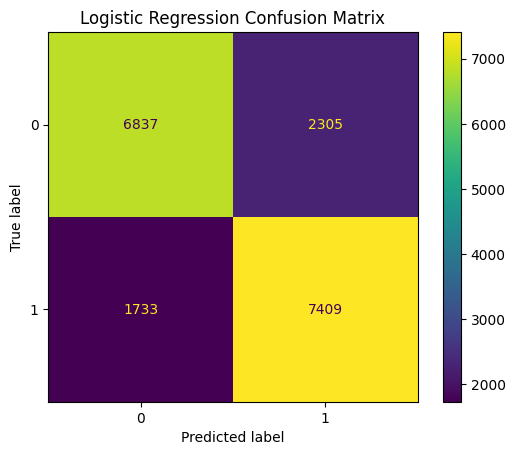

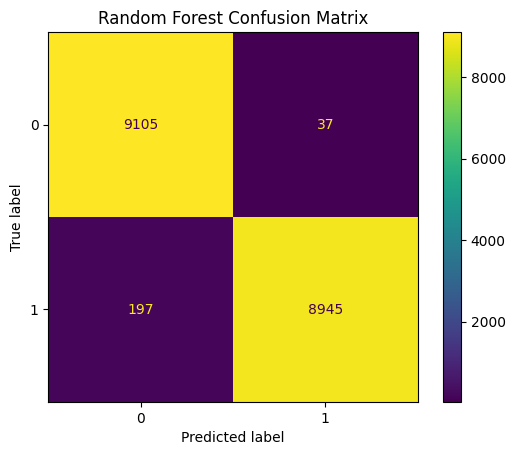

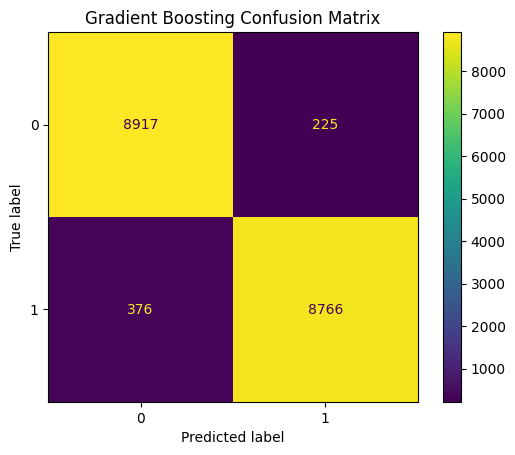

Since the company needs to predict the total number of workers who leave a company over time, and dont want missing an potential leaving employee that was predicted wrongly for staying

Therefore we need to Prioritizing to identify employees who predicted to leave (True Positives) and also missing an employee who is likely to leave (False Negative) could be costly

We will use RECALL as a matric for determing the performance of each model in the confusion matrix, since we use True Positives and and False Negative for Recall calculation


In [109]:
# Computing ROC for each model and plot
plt.figure(figsize=(10, 8))

for model, y_pred in [('Logistic Regression', y_pred_log), ('Random Forest', y_pred_rf), ('Gradient Boosting', y_pred_gb)]:
    fpr, tpr, _ = roc_curve(ytrain_smote, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Ploting confusion matrix
ConfusionMatrixDisplay(confusion_matrix(ytrain_smote, y_pred_log)).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

ConfusionMatrixDisplay(confusion_matrix(ytrain_smote, y_pred_rf)).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

ConfusionMatrixDisplay(confusion_matrix(ytrain_smote, y_pred_gb)).plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Expaining the correct matric that should be used for employee turnover confusion matrix
print('Since the company needs to predict the total number of workers who leave a company over time, and dont want missing an potential leaving employee that was predicted wrongly for staying\n')
print('Therefore we need to Prioritizing to identify employees who predicted to leave (True Positives) and also missing an employee who is likely to leave (False Negative) could be costly\n')
print('We will use RECALL as a matric for determing the performance of each model in the confusion matrix, since we use True Positives and and False Negative for Recall calculation')

Suggesting various retention strategies for targeted employees.
Finding and using the best model, predict the probability of employee turnover
in the test data based on recall.
We will next categorize the employees into four zones and suggest your thoughts on the
retention strategies for each zone, based on the probability score range below: 
■ Safe Zone (Green) (Score < 20%)
■ Low-Risk Zone (Yellow) (20% < Score < 60%)
■ Medium-Risk Zone (Orange) (60% < Score < 90%)
■ High-Risk Zone (Red) (Score > 90%).

Logistic Regression Recall: 0.81
Random Forest Recall: 0.98
Gradient Boosting Recall: 0.96 

Random Forest Classifier model chosen
Test dataset result dataframe:
        Actual  Predicted  RandomForest_Proba_for_1       Risk_Zone
10627       0          0                      0.00       Safe Zone
2703        0          0                      0.37   Low-Risk Zone
6059        0          0                      0.02       Safe Zone
3258        0          0                      0.03       Safe Zone
4565        0          0                      0.01       Safe Zone
...       ...        ...                       ...             ...
4961        0          0                      0.00       Safe Zone
4557        0          0                      0.02       Safe Zone
6610        0          0                      0.05       Safe Zone
10327       0          0                      0.01       Safe Zone
731         1          1                      0.99  High-Risk Zone

[3000 rows x 4 columns]


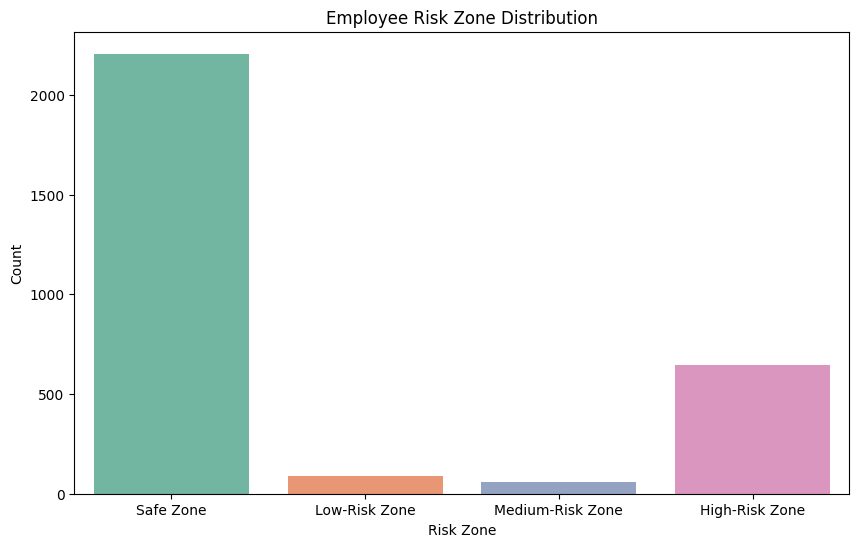

Safe Zone: Continue current engagement strategies.
Low-Risk Zone: Monitor and engage with low-risk employees to ensure job satisfaction.
Medium-Risk Zone: Implement specific retention measures like career development, mentorship programs.
High-Risk Zone: Conduct exit interviews, offer retention bonuses, and improve working conditions.


In [110]:
# Since we determined and explained that recall will be used as the sole performace matric 
# Logistic Regression recall
recall_log = recall_score(ytrain_smote, y_pred_log)
print(f"Logistic Regression Recall: {recall_log:.2f}")

# Random Forest recall
recall_rf = recall_score(ytrain_smote, y_pred_rf)
print(f"Random Forest Recall: {recall_rf:.2f}")

# Gradient Boosting recall
recall_gb = recall_score(ytrain_smote, y_pred_gb)
print(f"Gradient Boosting Recall: {recall_gb:.2f} \n")

# Determining best recall model 
if recall_log > recall_rf and recall_log > recall_gb:
    model = log_model
    print('Logistic Regression Classifier model chosen')
elif  recall_rf > recall_log and recall_rf > recall_gb:
    model = rf_model
    print('Random Forest Classifier model chosen')
elif recall_gb > recall_log and recall_gb > recall_rf:
    model = gb_model
    print('Gradient Boosting Classifier model chosen')
else:
    print('Two models having same recall')

# Training the best recall model on training set
model.fit(Xtrain_smote, ytrain_smote)
# Testing the trained model on testing set having emplyees that can leave (i.e. left = 1)
ytest_pred_proba = model.predict_proba(X_test)[:, 1]
# Prediciting based on probability
ytest_pred = model.predict(X_test)

# Creating dataframe that has acual vs predicted values of employee left
# It also includes the probability of 1 (employee leaving) 
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': ytest_pred ,'RandomForest_Proba_for_1': ytest_pred_proba})

# Visualizing the Risk Zones
# Assigning risk zones based on the chosen model to the datframe
results_df['Risk_Zone'] = pd.cut(results_df['RandomForest_Proba_for_1'], 
                                 bins=[-0.001, 0.2, 0.6, 0.9, 1.0001], 
                                 labels=['Safe Zone', 'Low-Risk Zone', 'Medium-Risk Zone', 'High-Risk Zone'])

# Displaying the new datframe that compares the actual vs predicted values of testing dataset
# It also includes the probability of 1 (employee leaving) and the risk zone that puts them in
print('Test dataset result dataframe:\n',results_df)

# Ploting the distribution of risk zones
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk_Zone', data=results_df, palette='Set2')
plt.title('Employee Risk Zone Distribution')
plt.xlabel('Risk Zone')
plt.ylabel('Count')
plt.show()

# Suggestions for Retention Strategies
print('Safe Zone: Continue current engagement strategies.\nLow-Risk Zone: Monitor and engage with low-risk employees to ensure job satisfaction.\nMedium-Risk Zone: Implement specific retention measures like career development, mentorship programs.\nHigh-Risk Zone: Conduct exit interviews, offer retention bonuses, and improve working conditions.')